# 01. Explore Data
Load data, basic stats, weather exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import seaborn as sns

# Load Data
base_df = utils.load_data()
if base_df is not None:
    print(f"Total records: {len(base_df):,}")
    print(f"Columns: {base_df.columns.tolist()}")

Total records: 9,756,638
Columns: ['route_id', 'trip_id', 'start_date', 'arrival_day_offset', 'direction_id', 'stop_id', 'stop_sequence', 'region_id', 'lat_sin', 'lat_cos', 'lon_sin', 'lon_cos', 'distance_from_downtown_km', 'scheduled_arrival_time', 'actual_arrival_time', 'arrival_delay', 'time_bucket', 'hour_of_day', 'day_of_week', 'has_active_alert', 'high_impact_alert_count', 'alert_police_activity', 'alert_construction', 'alert_technical_problem', 'alert_effect_no_service', 'alert_effect_detour', 'alert_severity_score']


In [2]:
# Basic Stats
if base_df is not None:
    print(f"Routes: {sorted(base_df['route_id'].unique())}")
    print(f"Date range: {base_df['start_date'].min()} to {base_df['start_date'].max()}")

    # Filter outliers
    base_df_filtered = base_df[(base_df['arrival_delay'] >= -600) & (base_df['arrival_delay'] <= 1800)]
    del base_df
    base_df_filtered = base_df_filtered[base_df_filtered['alert_effect_detour'] >= 0]
    print(f"Records after filtering outliers: {len(base_df_filtered):,}")

Routes: [6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6633, 6635, 6636, 6637, 6638, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6654, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663, 6664, 6665, 6666, 6667, 6668, 6672, 6673, 6674, 6675, 6676, 6677, 6678, 6679, 6680, 6682, 6683, 6685, 6686, 6687, 6688, 6689, 6690, 6691, 6692, 6693, 6698, 6699, 6700, 6701, 6702, 6703, 6704, 6705, 6706, 6707, 6708, 6709, 6710, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6723, 6724, 6725, 6726, 6727, 6728, 6730, 6737, 6738, 6739, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749, 6754, 6761, 6762, 6776, 6779, 6780, 6790, 6796, 6799, 6800, 6804, 6805, 6806, 6811, 6817, 6818, 6819, 6821, 6822, 6823, 6825, 6827, 6828, 6829, 6830, 6831, 6833, 6834, 6835, 6836, 6837, 6838, 6840, 6841, 6843, 6844, 7224, 7321, 7322, 8289, 8290, 9745, 10232, 11201, 11692, 11693, 11696, 12940, 13684, 16717,

In [3]:
base_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9278677 entries, 0 to 9756637
Data columns (total 27 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   route_id                   int64  
 1   trip_id                    int64  
 2   start_date                 object 
 3   arrival_day_offset         int64  
 4   direction_id               int64  
 5   stop_id                    int64  
 6   stop_sequence              int64  
 7   region_id                  object 
 8   lat_sin                    float64
 9   lat_cos                    float64
 10  lon_sin                    float64
 11  lon_cos                    float64
 12  distance_from_downtown_km  float64
 13  scheduled_arrival_time     object 
 14  actual_arrival_time        object 
 15  arrival_delay              int64  
 16  time_bucket                object 
 17  hour_of_day                int64  
 18  day_of_week                float64
 19  has_active_alert           int64  
 20  high_im

In [4]:
base_df_filtered.isnull().sum()

route_id                          0
trip_id                           0
start_date                        0
arrival_day_offset                0
direction_id                      0
stop_id                           0
stop_sequence                     0
region_id                    288480
lat_sin                           0
lat_cos                           0
lon_sin                           0
lon_cos                           0
distance_from_downtown_km         0
scheduled_arrival_time            0
actual_arrival_time               0
arrival_delay                     0
time_bucket                       0
hour_of_day                       0
day_of_week                       0
has_active_alert                  0
high_impact_alert_count           0
alert_police_activity             0
alert_construction                0
alert_technical_problem           0
alert_effect_no_service           0
alert_effect_detour               0
alert_severity_score              0
dtype: int64

In [6]:
# region_idがnullの行の重複数を確認
null_region_df = base_df_filtered.loc[base_df_filtered['region_id'].isnull()]
print(f"region_idがnullの行数: {len(null_region_df):,}")
print(f"重複行数: {null_region_df.duplicated().sum():,}")
null_region_df.duplicated().value_counts()

region_idがnullの行数: 288,480
重複行数: 98,372


False    190108
True      98372
Name: count, dtype: int64

In [7]:
null_region_df[~null_region_df.duplicated()].head()

,route_id,trip_id,start_date,arrival_day_offset,direction_id,stop_id,stop_sequence,region_id,lat_sin,lat_cos,...,hour_of_day,day_of_week,has_active_alert,high_impact_alert_count,alert_police_activity,alert_construction,alert_technical_problem,alert_effect_no_service,alert_effect_detour,alert_severity_score
26465,11692,14715004,20251210,0,1,7166,1,None,0.755926,0.654657,...,5,3.0,0,0,0,0,0,0,0,0
26473,11692,14715004,20251210,0,1,7093,3,None,0.755922,0.654662,...,5,3.0,0,0,0,0,0,0,0,0
26492,11692,14715002,20251210,0,1,7093,3,None,0.755922,0.654662,...,6,3.0,0,0,0,0,0,0,0,0
26534,11692,14715003,20251210,0,1,7166,1,None,0.755926,0.654657,...,6,3.0,0,0,0,0,0,0,0,0
26536,11692,14715003,20251210,0,1,7166,1,None,0.755926,0.654657,...,6,3.0,0,0,0,0,0,0,0,0


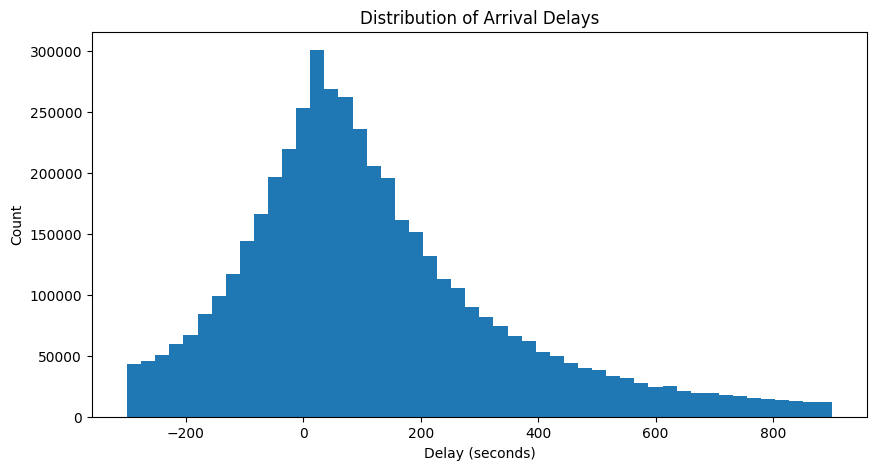

In [4]:
plt.figure(figsize=(10, 5))
plt.hist(base_df_filtered['arrival_delay'], bins=50, range=(-300, 900))
plt.title('Distribution of Arrival Delays')
plt.xlabel('Delay (seconds)')
plt.ylabel('Count')
plt.show()

## Timeline Metrix

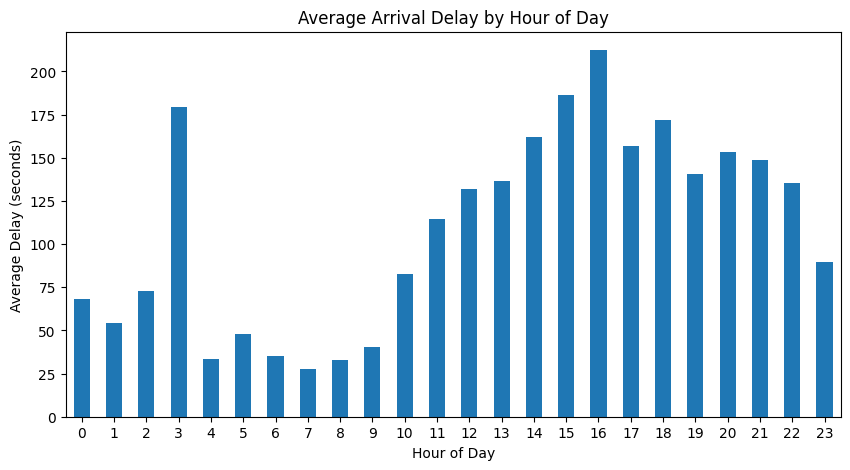

In [5]:
base_df_filtered.groupby('hour_of_day')['arrival_delay'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Arrival Delay by Hour of Day')
plt.xticks(rotation=0)
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (seconds)')
plt.show()

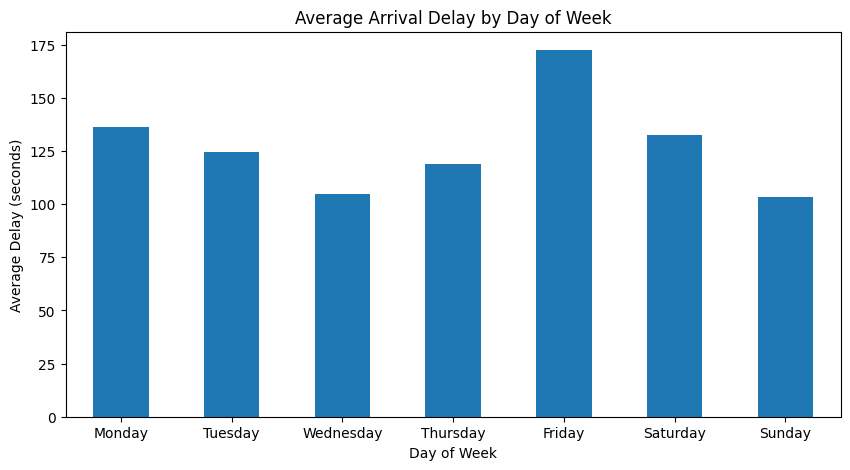

In [6]:
# Map day_of_week to names (ISODOW: 1=Monday, 7=Sunday)
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
daily_delays = base_df_filtered.groupby('day_of_week')['arrival_delay'].mean()
daily_delays.index = daily_delays.index.map(day_map)

daily_delays.plot(kind='bar', figsize=(10, 5))
plt.title('Average Arrival Delay by Day of Week')
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (seconds)')
plt.show()

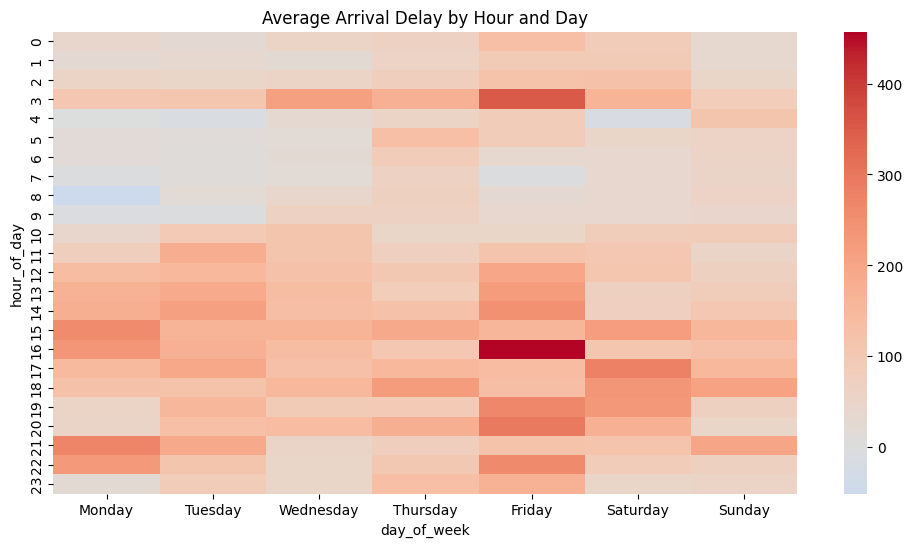

In [7]:
plt.figure(figsize=(12, 6))
pivot_data = base_df_filtered.pivot_table(index='hour_of_day', columns='day_of_week', values='arrival_delay', aggfunc='mean')

# Rename columns (ISODOW: 1=Monday, 7=Sunday)
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
pivot_data.columns = pivot_data.columns.map(day_map)

# Reorder columns (use reindex to handle missing days)
pivot_data = pivot_data.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.heatmap(pivot_data, cmap='coolwarm', center=0, annot=False)
plt.title('Average Arrival Delay by Hour and Day')
plt.show()

## Region Metrix

In [ ]:
route_path = '/workspace/GTFS/data_analysis/google_transit/trips.txt'
route_df = pd.read_csv(route_path)
route_df[['route_id', 'direction_id', 'trip_headsign']].drop_duplicates()

In [ ]:
# Calculate mean delay
top_delays = base_df_filtered.groupby(['route_id', 'direction_id'])['arrival_delay'].mean().reset_index()

# Get unique route names (taking the first headsign for each route/direction combination)
route_names = route_df[['route_id', 'direction_id', 'trip_headsign']].drop_duplicates().groupby(['route_id', 'direction_id']).first().reset_index()

# Ensure route_id is string in both
top_delays['route_id'] = top_delays['route_id'].astype(str)
route_names['route_id'] = route_names['route_id'].astype(str)

# Merge
top_delays = top_delays.merge(route_names, on=['route_id', 'direction_id'], how='left')

# Create label
top_delays['label'] = top_delays.apply(lambda x: f"{x['trip_headsign']}", axis=1)

# Plot
top_delays.sort_values('arrival_delay', ascending=False).head(10).set_index('label')['arrival_delay'].plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Routes by Average Arrival Delay')
plt.xlabel('Route (Headsign)')
plt.ylabel('Average Delay (s)')
plt.show()

In [ ]:
base_df_filtered.groupby('region_id')['arrival_delay'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Average Arrival Delay by Region')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region ID')
plt.ylabel('Average Delay (seconds)')
plt.show()

In [ ]:
region_order = base_df_filtered.groupby('region_id')['arrival_delay'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
pivot_data = base_df_filtered.pivot_table(index='hour_of_day', columns='region_id', values='arrival_delay', aggfunc='mean')

# Reorder columns based on region_order
pivot_data = pivot_data.reindex(columns=region_order)

sns.heatmap(pivot_data, cmap='coolwarm', center=0, annot=False)
plt.title('Average Arrival Delay by Hour and Region')
plt.show()

In [ ]:
import geopandas as gpd
from shapely import wkt
import folium
from folium.plugins import HeatMap
# Load regions data
regions_df = pd.read_csv('gtfs_static.regions.csv')

# Clean WKT (remove SRID prefix if present)
regions_df['boundary_clean'] = regions_df['boundary'].apply(lambda x: x.split(';')[-1] if isinstance(x, str) and ';' in x else x)

# Convert to GeoDataFrame
# Filter out rows where boundary is null or invalid if necessary
regions_df = regions_df.dropna(subset=['boundary_clean'])
regions_df['geometry'] = regions_df['boundary_clean'].apply(wkt.loads)
gdf_regions = gpd.GeoDataFrame(regions_df, geometry='geometry')

# Set CRS to EPSG:4326 (WGS 84) as indicated by SRID=4326 in the CSV
gdf_regions.set_crs(epsg=4326, inplace=True)

# Calculate mean delay by region
region_delays = base_df_filtered.groupby('region_id')['arrival_delay'].mean().reset_index()

# Merge
gdf_regions = gdf_regions.merge(region_delays, on='region_id', how='left')

# Fill NaN delays with 0 or handle them (e.g., for visualization purposes)
gdf_regions['arrival_delay'] = gdf_regions['arrival_delay'].fillna(0)

# Create Map
m_regions = folium.Map(location=[49.2827, -123.1207], zoom_start=10)

# Add Choropleth
folium.Choropleth(
    geo_data=gdf_regions,
    name='choropleth',
    data=gdf_regions,
    columns=['region_id', 'arrival_delay'],
    key_on='feature.properties.region_id',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Average Arrival Delay (s)'
).add_to(m_regions)

# Add tooltips
folium.GeoJson(
    gdf_regions,
    tooltip=folium.GeoJsonTooltip(fields=['region_name', 'arrival_delay'], aliases=['Region:', 'Avg Delay:']),
    style_function=lambda x: {'color': 'transparent', 'fillColor': 'transparent', 'weight': 0}
).add_to(m_regions)

folium.LayerControl().add_to(m_regions)

m_regions

In [ ]:
# Calculate Lat/Lon from sin/cos components
# Assuming lat_sin = sin(lat_rad), lat_cos = cos(lat_rad)
# lat_rad = arctan2(lat_sin, lat_cos)

# Group by stop_id to get unique stops and their average delay
stop_stats = base_df_filtered.groupby('stop_id').agg({
    'arrival_delay': 'mean',
    'lat_sin': 'first',
    'lat_cos': 'first',
    'lon_sin': 'first',
    'lon_cos': 'first'
}).reset_index()

# Recover Lat/Lon (in degrees)
stop_stats['stop_lat'] = np.degrees(np.arctan2(stop_stats['lat_sin'], stop_stats['lat_cos']))
stop_stats['stop_lon'] = np.degrees(np.arctan2(stop_stats['lon_sin'], stop_stats['lon_cos']))

# Create Map centered on Vancouver
vancouver_stop_map = folium.Map(location=[49.2827, -123.1207], zoom_start=11)

# Prepare data for HeatMap: [lat, lon, weight]
stop_heat_data = stop_stats[['stop_lat', 'stop_lon', 'arrival_delay']].values.tolist()

# Add HeatMap
HeatMap(stop_heat_data, radius=10, max_zoom=13).add_to(vancouver_stop_map)

vancouver_stop_map

## Alert Metrix

In [ ]:
# Analyze delay difference with and without detour for each trip
# Create a binary flag for detour
base_df_filtered['has_detour'] = base_df_filtered['alert_effect_detour'] > 0

# Calculate mean delay for each trip_id, separated by detour status
# We group by route_id and direction_id as well to keep context
trip_detour_analysis = base_df_filtered.groupby(['route_id', 'direction_id', 'trip_id', 'has_detour'])['arrival_delay'].mean().unstack()

# Rename columns for clarity (False -> No Detour, True -> With Detour)
trip_detour_analysis.columns = ['No Detour', 'With Detour']

# Filter trips that have data for both conditions (to make a valid comparison)
valid_trips = trip_detour_analysis.dropna()

print(f"Number of trips with both detour and no-detour data: {len(valid_trips)}")

if len(valid_trips) > 0:
    corr = valid_trips['No Detour'].corr(valid_trips['With Detour'])

    # Visualization 1: Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=valid_trips, x='No Detour', y='With Detour', alpha=0.6)
    
    # Add diagonal line (y=x)
    max_val = max(valid_trips['No Detour'].max(), valid_trips['With Detour'].max())
    min_val = min(valid_trips['No Detour'].min(), valid_trips['With Detour'].min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Equal Delay')

    plt.title(f'Average Arrival Delay per Trip: With vs Without Detour (Corr: {corr:.2f})')
    plt.xlabel('Average Delay (No Detour) [s]')
    plt.ylabel('Average Delay (With Detour) [s]')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Not enough data to compare trips with and without detours (no trips have both conditions).")

In [ ]:
trip_detour_analysis = base_df_filtered.groupby(['route_id', 'direction_id', 'trip_id', 'has_active_alert'])['arrival_delay'].mean().unstack()

# Rename columns for clarity (False -> No Detour, True -> With Detour)
trip_detour_analysis.columns = ['No alert', 'With alert']

# Filter trips that have data for both conditions (to make a valid comparison)
valid_trips = trip_detour_analysis.dropna()

print(f"Number of trips with both detour and no-detour data: {len(valid_trips)}")

if len(valid_trips) > 0:
    # Calculate correlation
    corr = valid_trips['No alert'].corr(valid_trips['With alert'])

    # Visualization 1: Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=valid_trips, x='No alert', y='With alert', alpha=0.6)
    
    # Add diagonal line (y=x)
    max_val = max(valid_trips['No alert'].max(), valid_trips['With alert'].max())
    min_val = min(valid_trips['No alert'].min(), valid_trips['With alert'].min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Equal Delay')
    
    plt.title(f'Average Arrival Delay per Trip: With vs Without Alert (Corr: {corr:.2f})')
    plt.xlabel('Average Delay (No alert) [s]')
    plt.ylabel('Average Delay (With alert) [s]')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Not enough data to compare trips with and without detours (no trips have both conditions).")